## Transient Grating  Gold 

* The aim is to use our software and consider a transient grating on a gold material. The results are compared to "[Non- equilibrium transient thermal grating relaxation in metal](https://aip.scitation.org/doi/abs/10.1063/1.3569731?journalCode=jap)", _by A.A. Maznev, J.A. Johnson._
* We consider sinusoidal heating of the electron system and a lattice system at 300K as initial condition. 
* The domain is extended periodically and Neumann boundary conditions are chosen on the left and on the right side. This is justified, since the sinusoidal temperature distribution in the beginning is chosen according to that. 
* A detailed description of the work flow is given
* Values obtained by the simulation are in agreement with analytical results and the results/figures presented in the paper. 
* To make the simulation run, import all the packages needed: [TTMObject](https://github.com/udcm-su/heat-diffusion-1D/blob/master/Code/TTMObject.py),[Numpy](https://pypi.org/project/numpy/); [Matplotlib](https://pypi.org/project/matplotlib/) [B-splines](https://github.com/johntfoster/bspline); [Progressbar](https://pypi.org/project/tqdm/)

Let us consider the following problem

\begin{equation}
C_E\partial_t T_E = k_E\partial^2_x T_E + G(T_L-T_E)
\end{equation}
\begin{equation}
C_L\partial_t T_L = k_L\partial^2_x T_L + G(T_E-T_L)
\end{equation}


with 
$C_E = 2\cdot 10^{4}\,\text{J K}^{-1}\text{m}^{-3}$ , $C_L = 2.5\cdot 10^{6}\text{J K}^{-1}\text{m}^{-3}$,
$k_E = 3.2\cdot 10^{+1}\mathrm{W K^{-1} m^{-2} s^{-1}}$, $k_L = 2.75\mathrm{W\, K^{-1}\, m^{-2}\, s^{-1}}$ and
$G=3\cdot 10^{16}\mathrm{W \,K^{-1}}$

Consider the following initial condition

\begin{align}
T_E'(x,t=0) &= T_E(t)sin(qx) \qquad\qquad     &T_L'(x,t=0)  &= 0 \\
T_E''(x,t=0)&= 600           \qquad\qquad     &T_L''(x,t=0) &= 300 \\
T_E &= T_E' + T_E''          \qquad\qquad     &T_L          &= T_L' + T_L''
\end{align}

We expect the solution to have the form

\begin{equation}
T_E(t) = T_{E1}\exp(-\gamma_1t)+ T_{E2}\exp(-\gamma_2 t) + T_{E3}\exp(-\gamma_3 t) + D
\qquad\qquad
T_L(t) = T_{L1}\exp(-\gamma_1t)+ T_{L2}\exp(-\gamma_2 t) + T_{L3}\exp(-\gamma_3 t) + E
\end{equation}

This can be proved analytically but the expressions of $\gamma_1$ and $\gamma_2$ are quite long, a simplified approximate expression is reported in "[Non- equilibrium transient thermal grating relaxation in metal](https://aip.scitation.org/doi/abs/10.1063/1.3569731?journalCode=jap)", _by A.A. Maznev, J.A. Johnson._

The opposite of the eigenvalues $\gamma_{1,2}=-\lambda_{1,2}$ are also expected to be monotonically increasing functions of $q$.

In [1]:
# We First import all the Necessary Packages
from matplotlib import pyplot as plt
import numpy as np
from TTMObject import *

In [2]:
# We define all the material parameters
L  = 1e-6      # Length of the Grating
Ce = 2e+4      # Specific Heat Electrons
Cl = 2.5e6     # Specific Heat Lattice
ke = 3.2e+1    # Conductivity Electrons
kl = 2.75      # Conductivity Lattica
G  = 3e+16     #Exchange constant

__Some consideration on the model and the problem considered__:

- Density is not considered in the model, hence we have to consider $\rho=1$ in the layer properties definition


- Boundary condition are needed, let us imagine we have an infinitely long material $X=\mathbb{R}$, because of symmetries we can assume that the solution is periodic. We can then limit our problem to a single layer with zero flux Neumann boundary conditions on both sides. 
  
  (Note that the initial condition, a sinusoidal heat distribution on the electronic system is selected, such that peak of the temperature is on the edges, and hence $\partial_x T(x=0,t) = \partial_x T(x=L,t) = 0 $)

In [3]:
# Place Holder Source
s           = source()
s.optical_penetration_depth = 1 # can we use  a default value ? 
s.FWHM = 1 # can we use a default value ?
s.fluence   = 0
# Define Simulation
sim         = simulation(2,s)
# Define Initial Conditions
#This is a sinusoidal distribution with its maximum on the edge -> no flux on the edge -> Neumann condition
sim.temp_data.init     = lambda x: 600 + 300*np.cos(2*np.pi*x/L)
#The lattice stays at room temperatuer on the whole domain
sim.temp_data_Lat.init = 300
# Define Times
sim.final_time = 2e-9
#Manually set the timestep a bit below the recommendet timestep for stability to capture fast relaxation dynamics
sim.time_step  = 1.5e-13
# Define Material
sim.addLayer(L, [ke, kl], [Ce, Cl], 1, [G])

In [4]:
# RUN THE SIMULATION
[Te, Tl, x, t] = sim.run() 

-----------------------------------------------------------
The maunually chosen time step of 1.50e-13 is very small and will eventually cause a long simulation time.
We suggest a timestep of 6.50e-13 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 13333/13333 [00:03<00:00, 4037.16it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 3.318164348602295
-----------------------------------------------------------


times of the first plot:	[0.0e+00 1.5e-13 3.0e-13 4.5e-13]
times of the second plot:	[3.0e-11 6.0e-11 9.0e-11 1.2e-10]


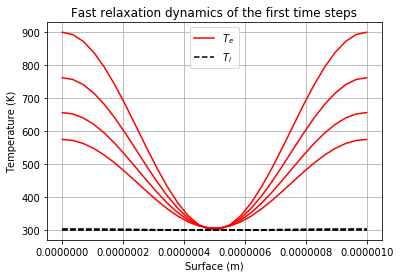

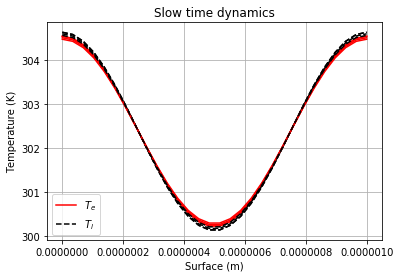

In [5]:
# Plot with the fast time dynamic
print("times of the first plot:\t" + str(t[0:4]))
plt.figure()
plt.title("Fast relaxation dynamics of the first time steps")
plt.xlabel("Surface (m)"); plt.ylabel("Temperature (K)")
plt.plot(x,Te[0,:],"r",label = "$T_e$")
plt.plot(x,Tl[0,:],"k--",label = "$T_l$")
for i in range(1,4): 
    plt.plot(x,Te[i,:],"r")
    plt.plot(x,Tl[i,:],"k--")
plt.legend()
plt.grid()
# Plot the slow time dynamic
print("times of the second plot:\t" + str(t[200:801:200]))

plt.figure()
plt.title("Slow time dynamics")
plt.xlabel("Surface (m)"); plt.ylabel("Temperature (K)")
plt.plot(x,Te[200,:],"r",label = "$T_e$")
plt.plot(x,Tl[200,:],"k--",label = "$T_l$")
for i in range(1,4): 
    plt.plot(x,Te[i*200,:],"r")
    plt.plot(x,Tl[i*200,:],"k--")
plt.legend()
plt.grid()

After seeing that the fast relaxation time dynamics are over, just after around 0.5 ps we select one point in space and observe the damping of the amplitude. This corresponds to a diffusion process, i.e. slow dynamics.

Therefor we select the index, where the amplitude shows a maximum and observe the decay over time. Note that one could also select another point in space and observe the same thing, just that the temperature would rise then rise in this point.

We skip the first points in time to only depict the slow diffusion dynamics. 

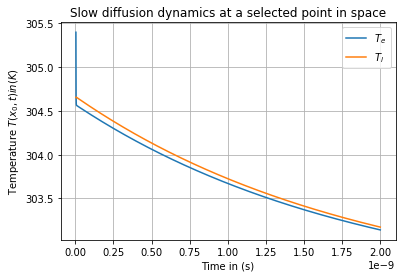

In [6]:
# Find the peak index (its value coincide with the sine amplitude)
index = np.where(Te[0,:] == max(Te[0,:]))[0][0]
#Note: One can also select any other index, i.e. the point in the middle: index = 12
skip = 25
# Plot in time
plt.figure()
plt.title("Slow diffusion dynamics at a selected point in space")
plt.xlabel("Time in (s)"); plt.ylabel("Temperature $T(x_0,t) in (K)$") 
plt.plot(t[skip:], Te[skip:, index],label = "$T_e$")
plt.plot(t[skip:], Tl[skip:, index],label = "$T_l$")
plt.legend()
plt.grid()

**Consideration on the Plots**:

As we can see from the plots there are two extremely different time scales, i.e. $\gamma_1\gg\gamma_2$, hence after a short time we can only see one exponential since the other one dies exremely fast.

We can verify with the analytical formulas, no curve fit package is really necessary since we won't use the time constant as a fitting parameter.


**Consideration on the Analytic Comparison**:

There exist two possible way to make this comparison

- Try to fit a curve and graphically visualize if they overlap

- Calculate analitically and numerically the time constants, then evaluate the numeric difference


**Analytical Value**

As reported in the article "[Non- equilibrium transient thermal grating relaxation in metal](https://aip.scitation.org/doi/abs/10.1063/1.3569731?journalCode=jap)", the values of $\gamma_{1,2}$ can be obtained by solving

\begin{equation}
\gamma^2+
\left[\left(\frac{k_E}{C_E}+\frac{k_L}{C_L}\right)q^2+G\left(\frac{1}{C_E}+\frac{1}{C_L}\right)\right]\gamma+
G\frac{k_E+k_L}{C_E+C_L}q^2+q^4\frac{k_Ek_L}{C_EC_L} = 0
\end{equation}
where $q$ is the qave number of the grating and $k_{e,l},C_{e,l}$ are the heat conductivity and heat capacity of the respective systm.

In [7]:
# Define the wavenumber acording to the grating period
q = 2*np.pi/L
# Find Analitical Values of gamma1 and gamma2
A = 1; B = (ke/Ce+kl/Cl)*q**2 + G*(1/Ce+1/Cl)
C = G*(ke+kl)*q**2/(Ce*Cl) + q**4*(ke*kl)/(Ce*Cl)
# Resolutive formula for 2nd grade equations
delta = B**2-4*A*C
gamma1AN = - (-B-np.sqrt(delta))/2
gamma2AN = - (-B+np.sqrt(delta))/2

**How do we extimate gamma from the numerical solution?**

- **Method 1: Using the derivative**

the derivative of an exponential is $\partial_t (Ae^{-\gamma t})=-A\gamma e^{-\gamma t}$, hence by calculating numerically the derivative one gets

$$
\gamma \approx -\frac{T(t+\Delta t)-T(t)}{T(t)\Delta t}
$$

- *Including the offset*
Note, that in this specific setting, we are neither considering symmetric around 300K sinusoidal initial conditions, see $T'(x,t=0)$, nor are we considering flat, see $T''(x,t=0)$ bondary conditions, but a mix of them. $T(x,t=0) = T'(x,t=0)+T''(x,t=0)$.

This leads to the fact that we can see an evolution in time of the temperature, according to $T'$ and one of the mean between the two, because of the presence of $T''$.

We can now adapt our numerical solution accordingly: 
\begin{align}
    T_e(t) = Ae^{-\gamma t} \\ 
    \tilde{T}_e(t) = Ae^{-\gamma t} + m(t) = T_e(t) + m(t)
\end{align}
Where $\tilde{T}_e(t)$ is the actual solution we are obtaining by the initial conditions that were chosen, such that $m(t)$ represents the mean value of the temperature over space at time $t$. Taking the derivative leads to
\begin{align}
    \partial_t \tilde{T}_e(t) &= -\gamma Ae^{-\gamma t}+\partial_t m(t) = -\gamma T_e(t) + \partial_t m(t) \text{   such that} \\
    \gamma &= -\frac{\partial_t \tilde{T}_e(t)-\partial_t m(t)}{T_e(t)}
\end{align}
using, that $T_e(t) = \tilde{T}_e(t)-m(t)$ we can numerricaly take the derivative via central differences and obtain a solution according to 
\begin{align}
    \gamma = -\frac{\tilde{T}_e(t+\Delta t)-m(t + \Delta t)-\tilde{T}_e(t)+m(t)}{\Delta t (\tilde{T}_e(t)-m(t))}
\end{align}


- **Method 2: Using the ratio**

according to our ansatz the ratio between temperature at two different times gives

$$
\frac{T(t+\Delta t)}{T(t)} \approx \frac{Ae^{-\gamma (t+\Delta t)}}{Ae^{-\gamma t}}=e^{-\gamma \Delta t}\implies \gamma \approx 
-\frac{1}{\Delta t}\log\frac{T(t+\Delta t)}{T(t)}
$$

Now note that using the initial conditions chosen we obtain solutions of the form $\tilde{T}(t) = T(t) + m(t)$, such that we can extract the parameter $\gamma$ by 
\begin{align}
    \gamma \approx 
-\frac{1}{\Delta t}\log\frac{T(t+\Delta t)-m(t+\Delta t)}{T(t)- m(t)}
\end{align}

We will use this method only for the slow time constant since the time step chosen may not accurately reproduce the fastest modes. (The timestep can be modified by setting `sim.time_step  = value`, where `value` has to be smaller than the suggested stability limit of the algorithm.)

Note that these two methods work for every $t$, hence it can also be used to verify the Ansatz, with respect to the fast modes and to obtain $\gamma_1$, which is the coefficient of the fast time dynamics. 

Note that, if one time coefficient $\gamma_1$ or $\gamma_2$ has to be extracted in an isolated way, the regime which is under consideration has to be selected, such that no _perturbation_ from the other time constant. 

That is, if $\gamma_1$ should be obtained, then one should look at times $t\in \approx [0,0.5]ps$. Where as, if the slow diffusive time constant $\gamma_2$ is under investigation, one should look at a regime $t\in \approx[2,1000]ps$

If some time in between is selected, the value obtained, $\bar{\gamma}$ will be a mix of the two time constants. That is $\gamma_2<\bar{\gamma}<\gamma_1$.  

In [8]:
#Look at a gamma mix, i.e. some perturbation from the fast dynamics
dt = sim.time_step
t0 = 60
gamma2NUM_der = -(Te[t0+1, index]-np.mean(Te[t0+1,:])-Te[t0, index]+np.mean(Te[t0,:]))/(dt*(Te[t0, index]-np.mean(Te[t0,:])))
gamma2NUM_rat = -np.log((Te[t0+1, index]-np.mean(Te[t0+1,:]))/(Te[t0, index]-np.mean(Te[t0,:])))/dt

print("Analytic value of gamma:    " + str(gamma2AN))
print("Numeric (1) value of gamma: " + str(gamma2NUM_der))
print("Numeric (2) value of gamma: " + str(gamma2NUM_rat))

Analytic value of gamma:    524465748.19299316
Numeric (1) value of gamma: 549323130.2405853
Numeric (2) value of gamma: 549345763.1762959


In [9]:
# Let's try again with a greater t0, maybe the fast transient is not completely ended
dt = sim.time_step
t0 = 1000
gamma2NUM_der = -(Te[t0+1, index]-np.mean(Te[t0+1,:])-Te[t0, index]+np.mean(Te[t0,:]))/(dt*(Te[t0, index]-np.mean(Te[t0,:])))
gamma2NUM_rat = -np.log((Te[t0+1, index]-np.mean(Te[t0+1,:]))/(Te[t0, index]-np.mean(Te[t0,:])))/dt

ae = ke/Ce; al = kl/Cl;
print("Analytic value of gamma:    " + str(gamma2AN))
print("Numeric (1) value of gamma: " + str(gamma2NUM_der))
print("Numeric (2) value of gamma: " + str(gamma2NUM_rat))
print("Paper Result eq(11) :       " + str(ae*q**2*(al*q**2+G/Cl)/(ae*q**2+G/Ce)))

Analytic value of gamma:    524465748.19299316
Numeric (1) value of gamma: 528634577.72964334
Numeric (2) value of gamma: 528655537.9267965
Paper Result eq(11) :       486659073.2069076


Now that the fast dynamics are over, the numerical results obtained by both of the methods, matches very well with the analytical result. 

Here we are also comparing it to the result of "[Non- equilibrium transient thermal grating relaxation in metal](https://aip.scitation.org/doi/abs/10.1063/1.3569731?journalCode=jap)", and see, that our findings are in _agreement_. 
Note that the slight difference can be explained, due to the fact that in the paper certain approximations,$C_e<<C_l$, are made, in order to simplify the reslult. 

**Plot Comparison**

For the curve fit we consider a funtion like

$$
f(t,[a]) = a\exp(-\gamma_2 t)
$$

where only $a$ is a fitting parameter, indeed the fitting has more sense the less are the free parameters used.

If we only look for a qualitative comparison one can attempt to find $a$ by imposing the equality of the fitting curve and numerical curve in one point arbitrarily chosen

$$
A\exp(-\gamma_2 t_0) + m(t) = \tilde{T}(t_0) \implies A = (\tilde{T}(t_0)-m(t_0))\exp(\gamma_2 t_0)
$$

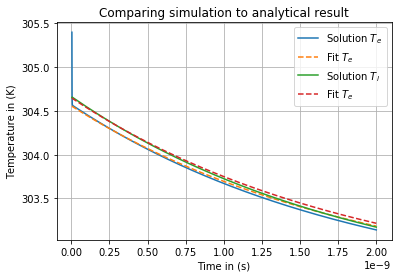

In [10]:
# time offset to extinguish the faster transient
t0 = 2000; 
# Proportionality constants
ae = (Te[t0, index]-np.mean(Te[t0,:]))*np.exp(gamma2AN*t[t0])
al = (Tl[t0, index]-np.mean(Te[t0,:]))*np.exp(gamma2AN*t[t0])
# Fitted* exponential
fit_e = ae*np.exp(-gamma2AN*t)+np.mean(Te[t0,:])
fit_l = al*np.exp(-gamma2AN*t)+np.mean(Te[t0,:])
# Plots
plt.figure()
plt.title("Comparing simulation to analytical result")
plt.xlabel("Time in (s)"); plt.ylabel("Temperature in (K)")
plt.plot(t[skip:], Te[skip:, index],label = "Solution $T_e$")
plt.plot(t[skip:], fit_e[skip:],'--',label = "Fit $T_e$")
plt.plot(t[skip:], Tl[skip:, index],label = "Solution $T_l$")
plt.plot(t[skip:], fit_l[skip:],'--',label = "Fit $T_e$")
plt.legend()
plt.grid()

**What else can be done**

- I didn't verify the dependence of $\gamma$ on $q$

- I didn't verify how good are the approximated formulas given in the paper

- I have no idea why the plots in the paper are so different in terms of time constants

- Check if this works also with physically realistic initial values of temperatures (Dirichlet boundary condition no more applicable)

In [11]:
# Run several simulations with different initial condition
gamma_sim = []
gamma_ana = []
gamma_pap = []
gamma_cla = []

qspan = np.linspace(2e5,1e7,10)
for i in range(0,len(qspan)):
    q = qspan[i]
    L = 1/q
    sim         = simulation(2,s)
    # Define Initial Conditions
    sim.temp_data.init     = lambda x: 600 + 300*np.cos(2*np.pi*x/L)
    sim.temp_data_Lat.init = 300
    # Define Times
    sim.final_time = .5e-9
    # Define Material
    sim.addLayer(L, [ke, kl], [Ce, Cl], 1, [G])
    # Run Simulation
    sim.run()
    # Computate Gamma Numerical value
    dt = sim.time_step
    gamma_sim.append(-np.log((Te[-1, index]-np.mean(Te[-1,:]))/(Te[-2, index]-np.mean(Te[-2,:])))/dt)

-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 1.27e-12 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████████| 393/393 [00:00<00:00, 3593.14it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 0.1093752384185791
-----------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 4.86e-13 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 1028/1028 [00:00<00:00, 2861.23it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 0.359285831451416
-----------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 1.93e-13 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 2596/2596 [00:00<00:00, 4154.33it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 0.6404788494110107
-----------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 9.81e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 5095/5095 [00:01<00:00, 3980.24it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 1.280074119567871
-----------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 5.86e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 8526/8526 [00:02<00:00, 4174.42it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 2.042438507080078
-----------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 3.88e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 12888/12888 [00:03<00:00, 4223.18it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 3.0517256259918213
-----------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 2.75e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 18182/18182 [00:04<00:00, 4471.69it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 4.066020250320435
-----------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 2.05e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 24407/24407 [00:05<00:00, 4439.51it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 5.513308525085449
-----------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 1.58e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 31563/31563 [00:06<00:00, 4557.09it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 6.926126718521118
-----------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 1.26e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 39651/39651 [00:09<00:00, 4401.90it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 9.007694721221924
-----------------------------------------------------------


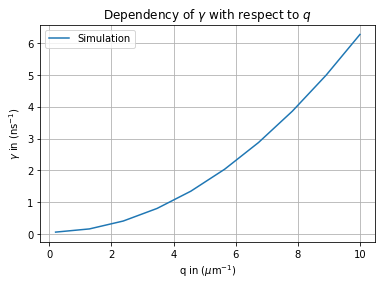

In [12]:
# Plot
gamma_sim = np.asarray(gamma_sim)
#converting units
qspan_um = qspan*1e-6 
gamma_sim_nm = gamma_sim*1e-9

plt.figure()
plt.title("Dependency of $\gamma$ with respect to $q$")
plt.xlabel("q in ($\mu$m$^{-1}$)"); plt.ylabel("$\gamma$ in (ns$^{-1}$)")
plt.plot(qspan_um, gamma_sim_nm,label = "Simulation")
plt.legend()
plt.grid();
plt.show();